In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
#first dataframe temporary_worker
df_canada_temporary_worker = pd.read_csv("./Dataset/IRCC_FF_TR_2017_05_CSV.csv", encoding="ISO-8859-1")


In [4]:
#clean first dataframe
del df_canada_temporary_worker["Unnamed: 1"]
df_canada_temporary_worker = df_canada_temporary_worker.rename(columns={'Unnamed: 0': "Country"})

In [5]:
#df_canada_temporary_worker.loc["Mean",:] = df_canada_temporary_worker.mean(axis=0)
df_canada_temporary_worker.loc[:,"Mean"] = df_canada_temporary_worker.mean(axis=1)
sorted_df_temp_worker = df_canada_temporary_worker.sort_values("Mean", ascending = False).head(4)
sorted_df_temp_worker

,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Mean
0,Philippines,46972,51292,44840,41762,40744,43689,39925,23642,14718,11901,35948.5
1,India,8332,8341,7519,5974,6698,8033,6251,3335,3288,5749,6352.0
5,United States of America,6241,6182,5019,4937,5755,5875,4481,3216,1918,1584,4520.8
3,Mexico,4792,4449,2787,4080,3003,4245,3879,2493,7961,2574,4026.3


In [6]:
plt_df_canada_temp_worker = sorted_df_temp_worker.head(3).T

new_header = plt_df_canada_temp_worker.iloc[0] #grab the first row for the header
plt_df_canada_temp_worker = plt_df_canada_temp_worker[1:] #take the data less the header row
plt_df_canada_temp_worker.columns = new_header #set the header row as the df header

plt_df_canada_temp_worker = plt_df_canada_temp_worker.drop(["Mean"])
plt_df_canada_temp_worker.reset_index(inplace=True)
plt_df_canada_temp_worker

Country,index,Philippines,India,United States of America
0,2008,46972,8332,6241
1,2009,51292,8341,6182
2,2010,44840,7519,5019
3,2011,41762,5974,4937
4,2012,40744,6698,5755
5,2013,43689,8033,5875
6,2014,39925,6251,4481
7,2015,23642,3335,3216
8,2016,14718,3288,1918
9,2017,11901,5749,1584


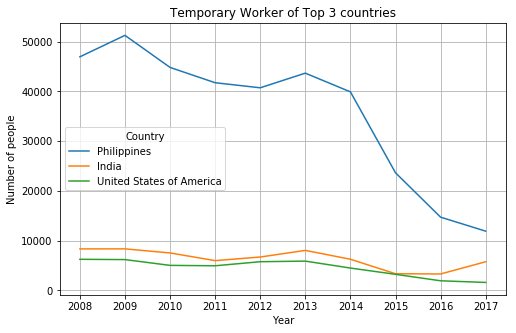

In [35]:
ax = plt_df_canada_temp_worker.plot(figsize=(8,5))
ax.set_xticks(plt_df_canada_temp_worker.index)
ax.set_xticklabels(plt_df_canada_temp_worker["index"])
ax.grid()
plt.title("Temporary Worker of Top 3 countries")
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.savefig('./Screenshots/TemporaryWorkerTop3countries.png')

In [10]:
#second dataframe temporary_worker became resident
df_canada_temp_pr = pd.read_csv("./Dataset/IRCC_FF_PR_2017_15_CSV_pr_contry.csv", encoding="ISO-8859-1")
df_canada_temporary_worker.head()
df_canada_temp_pr.head()

,Year/année,Source Country,Pays d'origine,Number/Nombre
0,2008,India,Inde,28255
1,2008,Philippines,Philippines,24883
2,2008,"China, People's Republic of","Chine, République populaire de",30030
3,2008,Syria,Syrie,919
4,2008,United States of America,États-Unis d'Amérique,10186


In [11]:
#clean second dataframe
del df_canada_temp_pr["Pays d'origine"]
df_canada_temp_pr = df_canada_temp_pr.rename(columns={"Year/année": "Year", "Source Country":"Country", "Number/Nombre":"Number"})

In [12]:
df_canada_temp_pr.head()
df_canada_temp_pr_pv= df_canada_temp_pr.pivot(index="Year", columns="Country", values="Number")
df_canada_temp_pr_pv
# data_total = df_canada_temp_pr.groupby("Year")

# df_canada_immi = pd.DataFrame({
#                  "Number": data_total["Number"].sum()})

# df_canada_immi = df_canada_immi.reset_index()
# df_canada_immi
# plt.bar(df_canada_immi["Year"], df_canada_immi["Number"])
# plt.title("Temporary Foreign Worker who became permanent residents")
# plt.xlim(2007, 2018)


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2008,2110,560,4005,0,76,32,540,205,1018,91,...,159,215,0,1239,1784,0,129,95,64,611
2009,1745,715,5390,0,62,38,467,267,1018,109,...,99,288,1,1352,2171,0,128,48,60,508
2010,1758,560,4751,0,61,27,459,252,933,124,...,93,289,0,998,1942,0,211,46,102,494
2011,2203,539,4325,0,39,37,278,236,849,84,...,81,162,0,1451,1723,0,159,17,69,434
2012,2635,619,3762,1,70,50,263,258,982,102,...,47,234,0,1366,1729,0,174,12,46,437
2013,2003,603,4325,1,45,25,282,208,1120,90,...,58,167,0,1022,2112,0,217,7,59,408
2014,1490,519,3653,0,21,50,214,205,1295,98,...,43,164,2,1483,2494,0,149,13,46,332
2015,2587,574,2835,2,30,51,237,302,1414,118,...,50,189,1,929,2591,0,206,25,56,238
2016,2635,513,2821,0,33,46,259,352,1694,102,...,57,216,0,1020,2446,1,158,1,54,286


In [13]:
df_canada_temp_pr_pv.loc[:,"Sum"] = df_canada_temp_pr_pv.sum(axis=1)
df_canada_temp_pr_pv



Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe,Sum
Year,,,,,,,,,,,,,,,,,,,,,
2008,2110,560,4005,0,76,32,540,205,1018,91,...,215,0,1239,1784,0,129,95,64,611,247243
2009,1745,715,5390,0,62,38,467,267,1018,109,...,288,1,1352,2171,0,128,48,60,508,252170
2010,1758,560,4751,0,61,27,459,252,933,124,...,289,0,998,1942,0,211,46,102,494,280690
2011,2203,539,4325,0,39,37,278,236,849,84,...,162,0,1451,1723,0,159,17,69,434,248702
2012,2635,619,3762,1,70,50,263,258,982,102,...,234,0,1366,1729,0,174,12,46,437,257763
2013,2003,603,4325,1,45,25,282,208,1120,90,...,167,0,1022,2112,0,217,7,59,408,259033
2014,1490,519,3653,0,21,50,214,205,1295,98,...,164,2,1483,2494,0,149,13,46,332,260297
2015,2587,574,2835,2,30,51,237,302,1414,118,...,189,1,929,2591,0,206,25,56,238,271832
2016,2635,513,2821,0,33,46,259,352,1694,102,...,216,0,1020,2446,1,158,1,54,286,296380


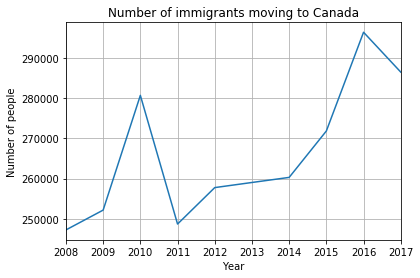

In [36]:
df_canada_temp_pr_pv = df_canada_temp_pr_pv[['Sum']]
df_canada_temp_pr_pv_reset = df_canada_temp_pr_pv.reset_index()
plt.plot(df_canada_temp_pr_pv_reset["Year"],df_canada_temp_pr_pv_reset["Sum"])
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.grid()
plt.title("Number of immigrants moving to Canada")
plt.xlim(2008, 2017)
plt.savefig('./Screenshots/NumberofimmigrantsmovingtoCanada.png')

In [15]:
df_canada_temp_pr.head()
value_check_df_temp_pr = df_canada_temp_pr.groupby("Country")
temp = value_check_df_temp_pr["Number"].mean()
top_3_df = temp.reset_index()

top_3_df = top_3_df.sort_values("Number", ascending = False)
top_3_df.reset_index(inplace = True)
top_3_df[["Country", "Number"]].head(3)


,Country,Number
0,Philippines,36618.7
1,India,35271.2
2,"China, People's Republic of",28693.7


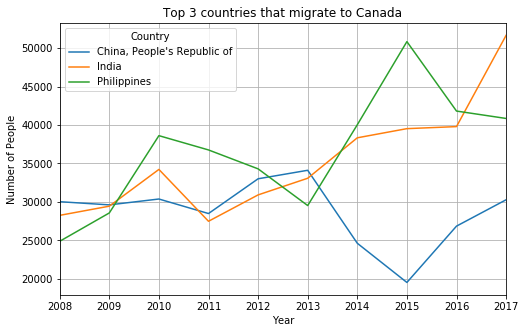

In [37]:
df_canada_temp_pr.head()
a= df_canada_temp_pr.loc[(df_canada_temp_pr['Country']=="Philippines") | (df_canada_temp_pr['Country']=="India")|
                                            (df_canada_temp_pr['Country']=="China, People's Republic of")]
pv  = a.pivot(index="Year", columns="Country", values="Number")
ax = pv.plot(figsize=(8,5))
ax.set_ylabel("Number of People")
ax.set_title("Top 3 countries that migrate to Canada")
ax.set_xlim(2008,2017)
ax.grid()
plt.savefig('./Screenshots/Top3countriesthatmigratetoCanada.png')

In [44]:
#third dataframe
df_canada_destination = pd.read_csv("./Dataset/IRCC_FF_TR_2017_08_CSV_destination.csv", encoding="ISO-8859-1")
df_canada_destination = df_canada_destination.rename(columns={"Unnamed: 0": "Province"})
del df_canada_destination["Unnamed: 1"]
df_canada_destination = df_canada_destination.drop([13])
# df_canada_destination= df_canada_destination.drop(df_canada_destination.index[[10,11,12,13]])
df_canada_destination_t = df_canada_destination.T
df_canada_destination_t


,0,1,2,3,4,5,6,7,8,9,10,11,12
Province,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Northwest Territories,Nunavut,Yukon
2008,501,270,1076,850,7195,35078,2242,1787,35512,26352,119,8,71
2009,629,338,1351,891,8051,31191,1954,2443,38283,28317,120,21,44
2010,405,379,1301,805,8045,28868,1107,1873,30072,20584,108,22,41
2011,467,389,1462,972,8135,22876,741,1432,28075,15878,96,27,27
2012,826,476,1412,1248,8524,23279,1065,2198,29697,18570,111,27,33
2013,1269,390,1220,1304,8941,23251,1431,3780,40786,22381,142,28,56
2014,991,378,959,1261,8967,19672,1234,3485,35556,21555,123,22,55
2015,546,396,694,952,7377,14368,855,1726,18028,14915,54,60,51
2016,540,491,706,863,7629,15778,757,1025,10752,11706,0,0,48


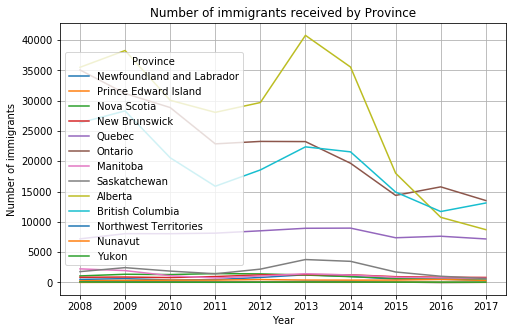

In [45]:
new_header = df_canada_destination_t.iloc[0] #grab the first row for the header
df_canada_destination_t = df_canada_destination_t[1:] #take the data less the header row
df_canada_destination_t.columns = new_header #set the header row as the df header
df_canada_destination_t.reset_index(inplace=True)

ax = df_canada_destination_t.plot(figsize=(8,5))
ax.set_xticks(df_canada_destination_t.index)
ax.set_xticklabels(df_canada_destination_t["index"])
plt.title("Number of immigrants received by Province")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")
plt.savefig('./Screenshots/NumberofimmigrantsreceivedbyProvince.png')
ax.grid()


# df_canada_destination_t.plot()

In [47]:

# df_canada_destination["2008"] = df_canada_destination["2008"]/df_canada_destination["2008"].sum()
df_canada_destination
for year in range(2008,2018):
#     print(df_canada_destination[str(year)])
    df_canada_destination[str(year)] = (df_canada_destination[str(year)]/df_canada_destination[str(year)].sum())*100

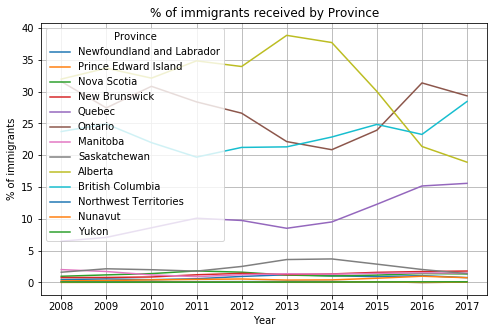

In [48]:

df_canada_destination_t_rate = df_canada_destination.T

new_header = df_canada_destination_t_rate.iloc[0] #grab the first row for the header
df_canada_destination_t_rate = df_canada_destination_t_rate[1:] #take the data less the header row
df_canada_destination_t_rate.columns = new_header #set the header row as the df header
df_canada_destination_t_rate.reset_index(inplace=True)
df_canada_destination_t_rate
ax1 = df_canada_destination_t_rate.plot(figsize=(8,5))
ax1.set_xticks(df_canada_destination_t_rate.index)
ax1.set_xticklabels(df_canada_destination_t_rate["index"])
plt.title("% of immigrants received by Province")
plt.xlabel("Year")
plt.ylabel("% of immigrants")
plt.savefig('./Screenshots/PercentofimmigrantsreceivedbyProvince.png')
ax1.grid()


In [22]:
max_df_canada = df_canada_destination_t_rate.max()
max_df_canada = max_df_canada.drop(["index"])
max_df_canada

Province
Newfoundland and Labrador     1.208813
Prince Edward Island          0.976240
Nova Scotia                   1.814414
New Brunswick                 1.794705
Quebec                       15.583767
Ontario                      31.584445
Manitoba                      2.018710
Saskatchewan                  3.697299
Alberta                      38.851580
British Columbia             28.461372
Northwest Territories         0.135265
Nunavut                       0.099963
Yukon                         0.097656
dtype: float64

In [23]:
#df_canada_destination.transpose()[2:].reset_index().apply(pd.to_numeric, errors="ignore").plot(x = "index")
# calc_df_canada =df_canada_destination.transpose()[2:].reset_index().apply(pd.to_numeric, errors="ignore")


In [24]:
import requests
import json

# Google API Key
from config import gkey
from pprint import pprint

In [25]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
location=[]
for city in df_canada_destination["Province"]:
    param = {"address": city, "key": gkey}
    response = requests.get(base_url, params=param).json()
#     pprint(response)
# Extract lat/lng
    lat = response["results"][0]["geometry"]["location"]["lat"]
    lng = response["results"][0]["geometry"]["location"]["lng"]
    print(f"{city}: {lat}, {lng}")
    location.append([lat, lng])

Newfoundland and Labrador: 53.1355091, -57.6604364
Prince Edward Island: 46.510712, -63.41681359999999
Nova Scotia: 44.68198659999999, -63.744311
New Brunswick: 46.5653163, -66.46191639999999
Quebec: 52.9399159, -73.5491361
Ontario: 51.253775, -85.323214
Manitoba: 53.7608608, -98.8138762
Saskatchewan: 52.9399159, -106.4508639
Alberta: 53.9332706, -116.5765035
British Columbia: 53.7266683, -127.6476205
Northwest Territories: 64.8255441, -124.8457334
Nunavut: 70.2997711, -83.10757699999999
Yukon: 64.2823274, -135


In [26]:
import gmaps
# Configure gmaps with API key
gmaps.configure(api_key=gkey)
len(location)


13

In [27]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(location, weights=max_df_canada, 
                                 dissipating=False, max_intensity=30,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 30
heat_layer.point_radius = 5

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))